length for each category: [100, 100, 100, 100, 100, 100]
number of images for each category: [100, 100, 100, 100, 100, 100]
256,256 is the min shape for Cherry___healthy
256,256 is the min shape for Cherry_Powdery_mildew
256,256 is the min shape for Corn___healthy
256,256 is the min shape for Corn_Common_rust
256,256 is the min shape for Grape___healthy
256,256 is the min shape for Grape_Isariopsis_Leaf_Spot
[INFO] pixels matrix: 28.80MB
[INFO] features matrix: 9.60MB
Random Forest Classifier: 

Confusion Matrix:
[[21  3  0  1  3  0]
 [ 1 19  0  2  3  0]
 [ 0  0 27  0  0  0]
 [ 0  1  0 26  0  0]
 [ 4  1  1  0 15  0]
 [ 0  1  0  0  3 18]]
Classification Report:
              precision    recall  f1-score   support

      Cherry       0.81      0.75      0.78        28
     CherryD       0.76      0.76      0.76        25
        Corn       0.96      1.00      0.98        27
       CornD       0.90      0.96      0.93        27
       Grape       0.62      0.71      0.67        21
      

C:\Users\Habib\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier: 

Confusion Matrix:
[[18  2  0  0  5  3]
 [ 1 22  0  1  1  0]
 [ 0  0 25  2  0  0]
 [ 0  9  0 18  0  0]
 [ 3  2  1  0 15  0]
 [ 2  3  0  1  2 14]]
Classification Report:
              precision    recall  f1-score   support

      Cherry       0.75      0.64      0.69        28
     CherryD       0.58      0.88      0.70        25
        Corn       0.96      0.93      0.94        27
       CornD       0.82      0.67      0.73        27
       Grape       0.65      0.71      0.68        21
      GrapeD       0.82      0.64      0.72        22

    accuracy                           0.75       150
   macro avg       0.76      0.74      0.74       150
weighted avg       0.77      0.75      0.75       150

Accuracy of Naive Bayes Classifier: 74.67%
Accuracy of features :  65.33333333333333
SVM Classifier: 

Confusion Matrix:
[[20  3  0  2  3  0]
 [ 7 15  0  1  2  0]
 [ 0  0 27  0  0  0]
 [ 3  2  1 21  0  0]
 [ 4  1  0  0 16  0]
 [ 1  0  0  1  2 18]]
Classification 

C:\Users\Habib\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Classifier: 

Confusion Matrix:
[[23  4  0  0  1  0]
 [ 3 14  0  4  4  0]
 [ 5  1  9  8  4  0]
 [ 0  0  0 27  0  0]
 [ 5  1  0  0 15  0]
 [ 0  0  1  1  2 18]]
Classification Report:
              precision    recall  f1-score   support

      Cherry       0.64      0.82      0.72        28
     CherryD       0.70      0.56      0.62        25
        Corn       0.90      0.33      0.49        27
       CornD       0.68      1.00      0.81        27
       Grape       0.58      0.71      0.64        21
      GrapeD       1.00      0.82      0.90        22

    accuracy                           0.71       150
   macro avg       0.75      0.71      0.70       150
weighted avg       0.75      0.71      0.69       150

Accuracy of Logistic Regression Classifier: 70.67%
Accuracy of features :  62.66666666666667
Linear Regression Classifier: 

Confusion Matrix:
[[22  4  0  0  2  0]
 [ 1 22  0  1  1  0]
 [ 0  0 27  0  0  0]
 [ 0  4  0 23  0  0]
 [ 3  2  1  0 15  0]
 [ 1  1

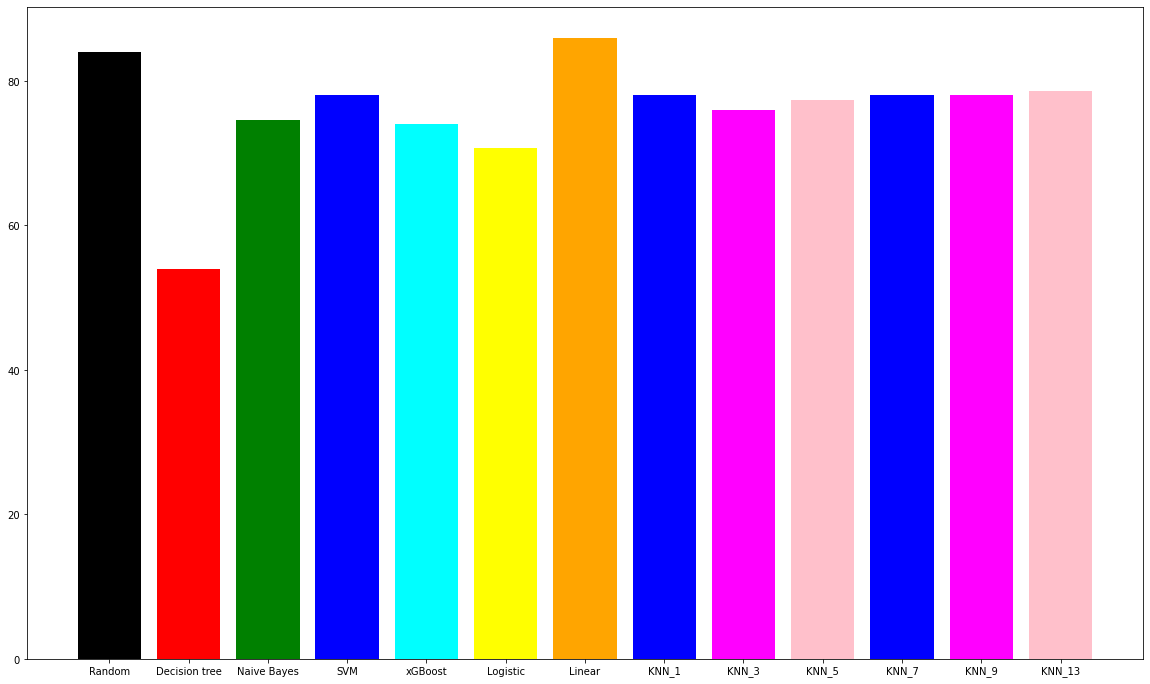

In [8]:
#Normalized Cut

import cv2
from skimage import data, segmentation, color, filters
from skimage.future import graph
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import os
from skimage.transform import resize
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split
from imutils import paths
import imutils # a simple image utility library
import cv2 #opencv library

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


base_path = 'I:/Research/datasets/Plant_sample100'
categories = ['Cherry___healthy', 'Cherry_Powdery_mildew', 'Corn___healthy', 
              'Corn_Common_rust', 'Grape___healthy', 'Grape_Isariopsis_Leaf_Spot']
fnames = []
for category in categories:
    folder = os.path.join(base_path, category)
    file_names = os.listdir(folder)
    full_path = [os.path.join(folder, file_name) for file_name in file_names]
    fnames.append(full_path)
print('length for each category:', [len(f) for f in fnames])

#reading images
images = []
for names in fnames:
    one_category_images = [cv2.imread(name) for name in names if (cv2.imread(name)) is not None]
    images.append(one_category_images)
print('number of images for each category:', [len(f) for f in images])

#identifying minimum shap for images
for i,imgs in enumerate(images):
    shapes = [img.shape for img in imgs]
    widths = [shape[0] for shape in shapes]
    heights = [shape[1] for shape in shapes]
    print('%d,%d is the min shape for %s' % (np.min(widths), np.min(heights), categories[i]))

def bgr2rgb(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
# resize the image to a fixed size, then flatten the image into a list of raw pixel intensities
def image_to_feature_vector(images, size=(128, 128)):
    return cv2.resize(images, size).flatten()
# extract a 3D color histogram from the HSV color space using the supplied number of bins per channel
def extract_color_histogram(imgs, bins=(16, 16, 16)):
    hsv = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist)
    return hist.flatten()

rawImages = []
labels = []
features = []

imagePaths = list(paths.list_images(base_path))
for (i, imagePath) in enumerate(imagePaths):
    
#     fig, axes = plt.subplots(ncols=4, figsize=(15, 3.5))
#     ax = axes.ravel()
#     ax[0] = plt.subplot(1, 4, 1)
#     ax[1] = plt.subplot(1, 4, 2)
#     ax[2] = plt.subplot(1, 4, 3) 
#     ax[2] = plt.subplot(1, 4, 4) 
    
    image = cv2.imread(imagePath)
    
#     ax[0].imshow(bgr2rgb(image))
#     ax[0].set_title('Original')
#     ax[0].axis('off')
    
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
#     #idx = np.random.randint(len(image))
#     '''
#     mask = np.zeros(image.shape[:2],np.uint8)
#     bgdModel = np.zeros((1,65),np.float64)
#     fgdModel = np.zeros((1,65),np.float64)

#     rect = (3,3,950,950)
#     cv2.grabCut(image,mask,rect,bgdModel,fgdModel,3,cv2.GC_INIT_WITH_RECT)

#     mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
#     img2 = image*mask2[:,:,np.newaxis]
#     '''
#     #img1=(imgs[idx])
#     #img1=(imgs[idx])
#     #img = data.coffee()
    
#   Normalize Cut........................................................................
    
    labels1 = segmentation.slic(image, compactness=30, n_segments=400)
    out1 = color.label2rgb(labels1, image, kind='avg')
    g = graph.rag_mean_color(image, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    out2 = color.label2rgb(labels2, image, kind='avg')
    
#     ax[1].imshow(out1, cmap=plt.cm.gray)
#     ax[1].set_title('out1')
#     ax[1].axis('off')
    
#     ax[2].imshow(out2, cmap=plt.cm.gray)
#     ax[2].set_title('out2')
#     ax[2].axis('off')
    
    hist = extract_color_histogram(out2)
    pixels = image_to_feature_vector(out2)
    rawImages.append(pixels)  #features
    labels.append(label)
    features.append(hist)
    
#     ax[3].hist(out2.ravel(),256,[0,256], color='r')
#     ax[3].set_title('Histogram')
#     plt.show()

rawImages = np.array(rawImages)
labels = np.array(labels)
features = np.array(features)

print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(features.nbytes / (1024 * 1000.0)))

# partition the data into training and testing splits, using 75%
# of the data for training and the remaining 25% for testing
(trainRI, testRI, trainRL, testRL) = train_test_split(rawImages, labels, test_size=0.25, random_state=22)
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(features, labels, test_size=0.25, random_state=22)

X_train,X_test, y_train, y_test = train_test_split(rawImages, labels, test_size=0.25, random_state=22)
(train_Feat, test_Feat, train_Labels, test_Labels) = train_test_split(features, labels, test_size=0.25, random_state=22)

#Random Forest Classifier:.................................................................................................

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=90)
clf1=RandomForestClassifier(n_estimators=90)

clf.fit(X_train,y_train)
clf1.fit(train_Feat,train_Labels)

#Test the model
y_pred=clf.predict(X_test)
y_pred1=clf1.predict(test_Feat)

#Generate confusion matrix
print("Random Forest Classifier: \n")
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

#Generate classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)
R_acc=(metrics.accuracy_score(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy of Random Forest: {:.2f}%".format(R_acc * 100))
print("Accuracy of features : ",(metrics.accuracy_score(test_Labels, y_pred1)*100))

#Decision Tree Classifier:................................................................................................

# Create Decision Tree classifer object
Dclf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
Dclf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
Dclf.fit(X_train,y_train)
Dclf1.fit(train_Feat,train_Labels)

#Predict the response for test dataset
Dy_pred = Dclf.predict(X_test)
Dy_pred1=Dclf1.predict(test_Feat)
print("Decision Tree Classifier: \n")
result2 = confusion_matrix(y_test, Dy_pred)
print("Confusion Matrix:")
print(result2)

#Generate classification report
result3 = classification_report(y_test, Dy_pred)
print("Classification Report:")
print(result3)

# Model Accuracy, how often is the classifier correct?
D_acc=metrics.accuracy_score(y_test, Dy_pred)
print("Accuracy of decision tree: {:.2f}%".format(D_acc * 100))
print("Accuracy of features : ",(metrics.accuracy_score(test_Labels, Dy_pred1)*100))

#Naive Bayes Classifier:................................................................................................

# Create Decision Tree classifer object
gnb = GaussianNB()
gnb1 = GaussianNB()

# Train Decision Tree Classifer
gnb.fit(X_train,y_train)
gnb1.fit(train_Feat,train_Labels)

#Predict the response for test dataset
Ny_pred = gnb.predict(X_test)
Ny_pred1=gnb1.predict(test_Feat)
print("Naive Bayes Classifier: \n")
result2 = confusion_matrix(y_test, Ny_pred)
print("Confusion Matrix:")
print(result2)

#Generate classification report
result3 = classification_report(y_test, Ny_pred)
print("Classification Report:")
print(result3)

# Model Accuracy, how often is the classifier correct?
N_acc=metrics.accuracy_score(y_test, Ny_pred)
print("Accuracy of Naive Bayes Classifier: {:.2f}%".format(N_acc * 100))
print("Accuracy of features : ",(metrics.accuracy_score(test_Labels, Ny_pred1)*100))

#SVM Classifier:.................................................................................................

# Create Decision Tree classifer object
Sclf = svm.SVC(kernel='linear')
Sclf1 = svm.SVC(kernel='linear')

# Train Decision Tree Classifer
Sclf.fit(X_train,y_train)
Sclf1.fit(train_Feat,train_Labels)

#Predict the response for test dataset
Sy_pred = Sclf.predict(X_test)
Sy_pred1=Sclf1.predict(test_Feat)
print("SVM Classifier: \n")
result2 = confusion_matrix(y_test, Sy_pred)
print("Confusion Matrix:")
print(result2)

#Generate classification report
result3 = classification_report(y_test, Sy_pred)
print("Classification Report:")
print(result3)

# Model Accuracy, how often is the classifier correct?
S_acc=metrics.accuracy_score(y_test, Sy_pred)
print("Accuracy of SVM Classifier: {:.2f}%".format(S_acc * 100))
print("Accuracy of features : ",(metrics.accuracy_score(test_Labels, Sy_pred1)*100))

#XGBoost:......................................................................................................

# Create Decision Tree classifer object
xg_cl = xgb.XGBClassifier(n_estimators=10,objective ='binary:logistic',colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10,)
xg_cl1 = xgb.XGBClassifier(n_estimators=10,objective ='binary:logistic',colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10,)

# Train Decision Tree Classifer
xg_cl.fit(X_train,y_train)
xg_cl1.fit(train_Feat,train_Labels)

#Predict the response for test dataset
xgy_pred = xg_cl.predict(X_test)
xgy_pred1=xg_cl1.predict(test_Feat)
print("xgBoost Classifier: \n")
result2 = confusion_matrix(y_test, xgy_pred)
print("Confusion Matrix:")
print(result2)

#Generate classification report
result3 = classification_report(y_test, xgy_pred)
print("Classification Report:")
print(result3)

# Model Accuracy, how often is the classifier correct?
xg_acc=metrics.accuracy_score(y_test, xgy_pred)
print("Accuracy of xgBoost Classifier: {:.2f}%".format(xg_acc * 100))
print("Accuracy of features : ",(metrics.accuracy_score(test_Labels, xgy_pred1)*100))

#Logistic Regression:................................................................................................

# Create Decision Tree classifer object
lr = LogisticRegression(solver='lbfgs', max_iter=1500, multi_class='auto')
lr1 = LogisticRegression(solver='lbfgs', max_iter=1500, multi_class='auto')

# Train Decision Tree Classifer
lr.fit(X_train,y_train)
lr1.fit(train_Feat,train_Labels)

#Predict the response for test dataset
ly_pred = lr.predict(X_test)
ly_pred1=lr1.predict(test_Feat)
print("Logistic Regression Classifier: \n")
result2 = confusion_matrix(y_test, ly_pred)
print("Confusion Matrix:")
print(result2)

#Generate classification report
result3 = classification_report(y_test, ly_pred)
print("Classification Report:")
print(result3)

# Model Accuracy, how often is the classifier correct?
l_acc=metrics.accuracy_score(y_test, ly_pred)
print("Accuracy of Logistic Regression Classifier: {:.2f}%".format(l_acc * 100))
print("Accuracy of features : ",(metrics.accuracy_score(test_Labels, ly_pred1)*100))

#Linear Regression with SVM:.............................................................................

# Create Decision Tree classifer object
svm = SVC(gamma='scale')
svm1 = SVC(gamma='scale')

# Train Decision Tree Classifer
svm.fit(X_train,y_train)
svm1.fit(train_Feat,train_Labels)

#Predict the response for test dataset
svy_pred = svm.predict(X_test)
svy_pred1=svm1.predict(test_Feat)
print("Linear Regression Classifier: \n")
result2 = confusion_matrix(y_test, svy_pred)
print("Confusion Matrix:")
print(result2)

#Generate classification report
result3 = classification_report(y_test, svy_pred)
print("Classification Report:")
print(result3)

# Model Accuracy, how often is the classifier correct?
sv_acc=metrics.accuracy_score(y_test, svy_pred)
print("Accuracy of Linear Regression Classifier: {:.2f}%".format(sv_acc * 100))
print("Accuracy of features : ",(metrics.accuracy_score(test_Labels, ly_pred1)*100))

#Knn Classifier:..................................................................................................
# train and evaluate a k-NN classifer on the raw pixel intensities
print("[INFO] evaluating raw pixel accuracy...")

neighbors = [1, 3, 5, 7, 9, 13]
train_scores=[]
k_pred = []
test_scores=[]

for k in neighbors:
    print(f"\nKNN classifier ( k = {k})\n")

    model = KNeighborsClassifier(n_neighbors= k)
    model.fit(trainRI,trainRL)
    train_score=model.score(trainRI,trainRL)
    y_predi = model.predict(testRI)
    prediction = metrics.accuracy_score(testRL, y_predi)
    k_pred.append(prediction)
    print("Accuracy of KNN: {:.1f}%".format(prediction * 100))
    
    CM= confusion_matrix(testRL,y_predi)
    print("Confusion Matrix:")
    print(CM)
    classi=classification_report(testRL,y_predi)
    print("Classification Report:")
    print(classi)
    
    test_score=model.score(testRI,testRL)
    print("[INFO] raw training accuracy of KNN: {:.2f}%".format(train_score * 100))
    print("[INFO] raw pixel testing accuracy of KNN: {:.2f}%".format(test_score * 100))
    
    model.fit(trainFeat,trainLabels)
    acc4=model.score(testFeat,testLabels)
    print("[INFO] Features accuracy of KNN: {:.2f}%".format(acc4 * 100))
        
#  Make a plot
height = [R_acc*100,D_acc*100, N_acc*100, S_acc*100, xg_acc*100, l_acc*100, sv_acc*100, 
          k_pred[0]*100, k_pred[1]*100, k_pred[2]*100, k_pred[3]*100, k_pred[4]*100, k_pred[5]*100]
bars = ('Random', 'Decision tree', 'Naive Bayes','SVM', 'xGBoost', 'Logistic', 'Linear', 
        'KNN_1', 'KNN_3', 'KNN_5', 'KNN_7', 'KNN_9', 'KNN_13')
y_pos = np.arange(len(bars))

plt.figure(figsize=(20, 12))
plt.bar(y_pos, height, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'blue', 'magenta', 'pink', 'blue', 'magenta', 'pink'])
plt.xticks(y_pos, bars)
plt.show()